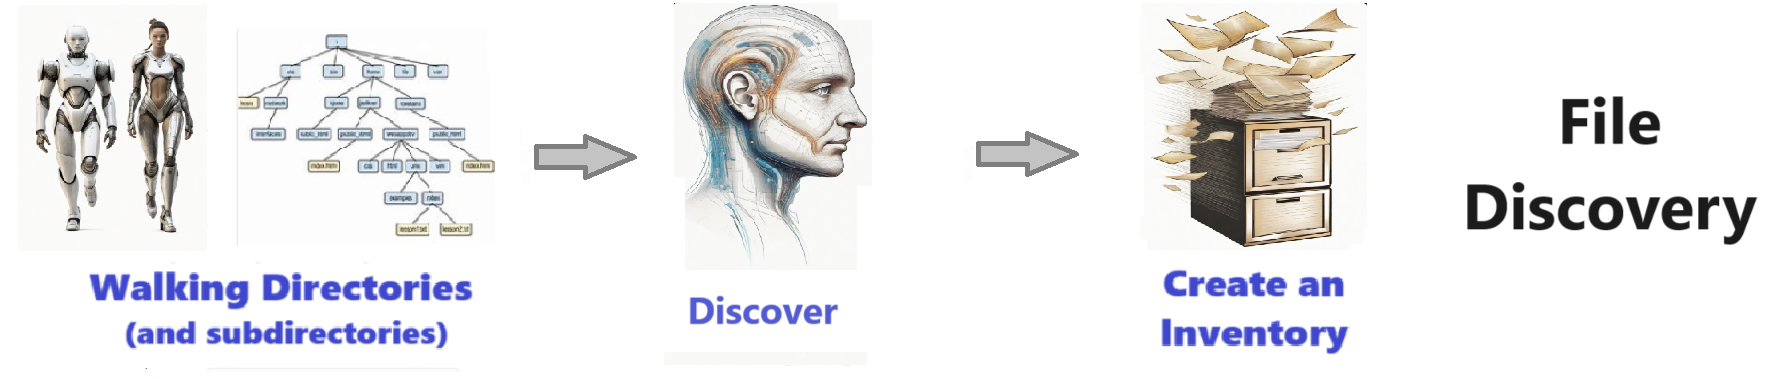

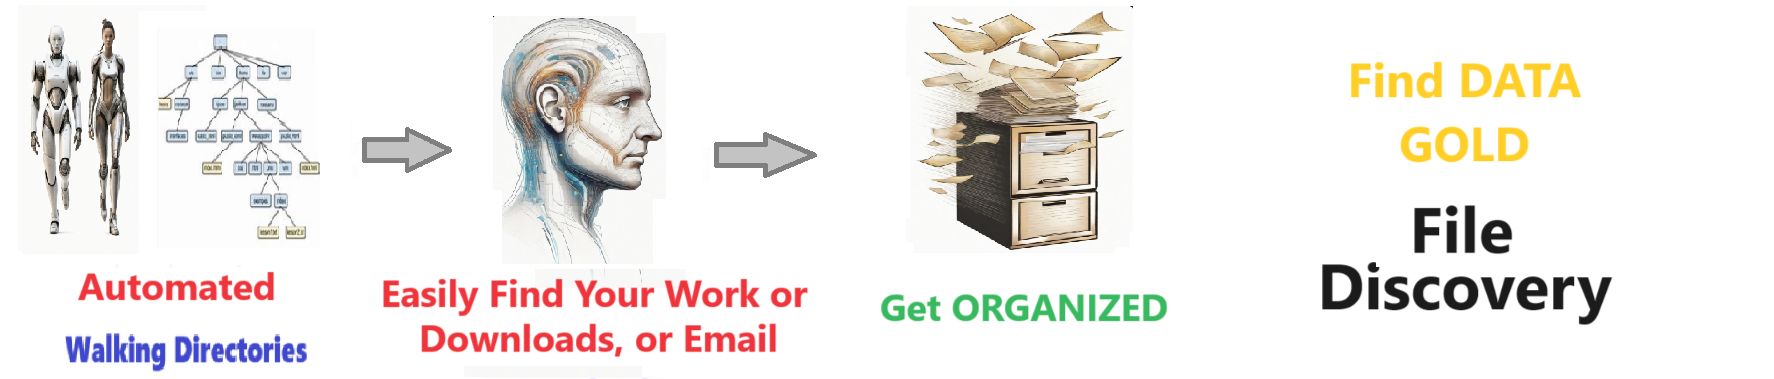

# File  Discovery 
#### Joe Eberle  - josepheberle@outlook.com
## https://GitHub//JoeEberle

In [ ]:
first_time_install = False
if first_time_install:
    ! pip install configparser
    ! pip install pyttsx3
    ! pip install datetime  
    ! pip install openpyxl   

In [ ]:
# Import the necessary Libraries 
import configparser
import pyttsx3
import pandas as pd 
import glob, os
import timeit
import time
from datetime import date, datetime

## Step 0 - Start Config Parser and Name the solution

In [ ]:
# Install any libraries you dont already have installed 
import configparser   
from datetime import date, datetime

# establish the configuration settings parser
config = configparser.ConfigParser()  
cfg = config.read('config.ini')   
config = configparser.ConfigParser()

# Establish some parameters 
solution_name = 'file_discovery'

current_working_directory = os.getcwd()
print(f'Step 0 - The solution {solution_name} is starting with the current working directory is:{current_working_directory} ')

## Step 0 - Initiate the Logger 

In [ ]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_start(solution_name, start_time) 
ql.set_speaking_log(False)
ql.set_speaking_steps(True)
ql.pvlog('info',f'Process {solution_name} Step 0 - Initializing and starting Process.') 

In [ ]:
# Optional Step 0 - Build a working directory to house your analysis
directory_path = r'c:\working_directory\file_registry'
# Create the directory if it doesn't exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    print(f"Directory '{directory_path}' created successfully.")
else:
    print(f"Directory '{directory_path}' already exists.")

## Step 2 - Walk the directory structure discovering files of a specific type

In [ ]:
def file_discovery(root_directory, file_type_extension):
    file_paths = []      # Initialize lists to store file paths and filenames
    filenames = []

    # Walk through the root directory and its subdirectories
    for root, _, files in os.walk(root_directory):
        for file in files:
            if file.endswith(file_type_extension):
                file_path = os.path.join(root, file)     # Get the full file path
                file_paths.append(file_path)             # Append the file path and filename to the lists
                filenames.append(file)

    # Create a pandas dataframe
    df = pd.DataFrame({'Filename': filenames, 'Filepath': file_paths})
    return df

testing_function = False
if testing_function:
    root_directory = 'c:/data'   
    file_type_extension = '.pdf'  # Change this to the desired file extension    
    ql.pvlog('info',f'Process {solution_name} Step 1 - Searching directory {root_directory} for files of type {file_type_extension}')     
    result_df = file_discovery(root_directory, file_type_extension)
    ql.pvlog('info',f'Process {solution_name} Step 1 Results - found {result_df.shape[0]} files of type {file_type_extension}')     
    result_df.head(10)
 

In [ ]:
testing_function = True
if testing_function:
    root_directory = 'c:/data'   
    file_type_extension = '.pdf'  # Change this to the desired file extension    
    ql.pvlog('info',f'Process {solution_name} Step 1 - Searching directory {root_directory} for files of type {file_type_extension}')     
    result_df = file_discovery(root_directory, file_type_extension)
    df_pdf_files = result_df
    ql.pvlog('info',f'Process {solution_name} Step 1 Results - found {result_df.shape[0]} files of type {file_type_extension}')     
result_df.head(3) 

In [ ]:
saving_results = True
if saving_results:
    save_directory = r"c:\working_directory\file_registry\pdf_files.xlsx"
    df_pdf_files.to_excel(save_directory, engine='openpyxl', index = False)   
    ql.pvlog('info',f'Process {solution_name} Step 2 Persisted Results to {save_directory} ')     
print(current_working_directory)

In [ ]:
os.chdir(current_working_directory) # necessary because the walker changes directories 

In [ ]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

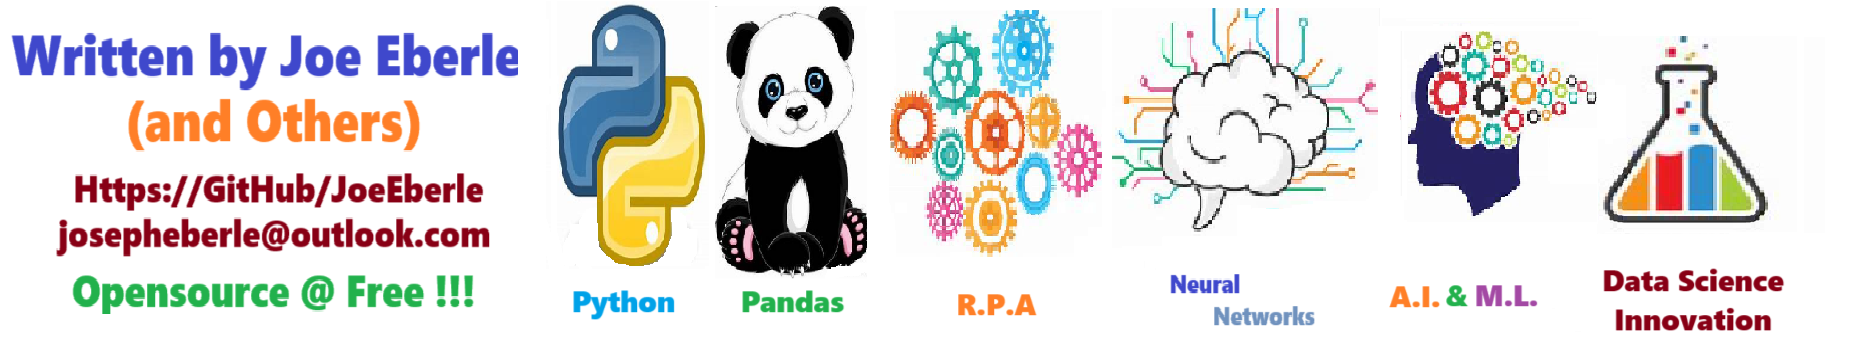